## Equipo B - "Gana" o "No Gana" ##

#### Importamos las librerías para ejecutar las operaciones ####

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import precision_score

### Importamos el Dataset enriquecido con variables objetivas nuevas ###

In [2]:
df = pd.read_excel("Pruebita4 con mas variables Binario_2eq.xlsx")
df.sample(10)

,date,home_team,away_team,home_score,away_score,Competicion Valoracion,Condicion A,Condicion B,Resultado Home,Dif Goles Home,...,M a M Dif Gol Hist Home,M a M Dif Gol Hist Away,Perfor 5 Años Home,Perfor 5 Años Away,Perfor 10 Años Home,Perfor 10 Años Away,M a M Com > 5 Home,M a M Com > 5 Away,Perfor 10 Añ Comp>5 Home,Perfor 10 Añ Comp>5 Away
4085,1957-08-31,254,6,5,5,1,0,0,0,0,...,0,0,-2,1,-2,1,0,0,0,-2
22108,1999-08-28,189,97,1,1,2,1,-1,0,0,...,0,0,-9,-3,-16,-12,0,0,-9,-2
8979,1974-09-28,143,262,4,1,1,1,-1,1,3,...,-15,15,-1,30,4,43,-1,1,-4,1
14986,1988-09-20,2,28,4,2,1,1,-1,1,2,...,11,-11,7,-5,10,7,0,0,1,4
10566,1978-11-29,50,202,0,2,3,1,-1,-1,-2,...,3,-3,-3,-9,2,-12,1,-1,3,-2
22098,1999-08-18,249,78,0,0,3,1,-1,0,0,...,-3,3,19,18,19,22,0,0,9,7
711,1924-10-05,83,37,2,1,1,1,-1,1,1,...,0,0,-2,-2,9,-2,0,0,0,0
22570,2000-03-29,44,199,1,0,1,1,-1,1,1,...,0,0,-7,-9,-7,-6,0,0,-2,-1
14193,1986-09-24,204,3,0,0,3,1,-1,0,0,...,-5,5,4,4,-11,16,0,0,-5,5
1244,1931-03-28,247,93,2,0,4,1,-1,1,2,...,11,-11,9,10,19,16,0,0,0,0


#### Definimos los nombres de las columnas y separamos las variables Target ####

In [3]:
df.columns = ['fecha', 'equipo_a', 'equipo_b', 'goles_a',
        'goles_b', 'valor_competicion', 'condicion_a', 'condicion_b',
       'resultado_a', 'diferencia_gol_a', 'resultado_b', 'diferencia_gol_b',
       'Dif Gol Acum Home', 'Dif Gol Acum Away', 'Performance Acum Home',
       'Performance Acum Away', 'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away', 'TargetA','TargetB','Dif Gol Acum a fecha Home',
       'Dif Gol Acum a fecha Away', 'Mano a Mano Histórico Home',
       'Mano a Mano Histórico Away', 'M a M = Cond 10 años Home',
       'M a M = Cond 10 años Away', 'M a M Dif Gol Hist Home',
       'M a M Dif Gol Hist Away', 'Perfor 5 Años Home', 'Perfor 5 Años Away',
       'Perfor 10 Años Home', 'Perfor 10 Años Away', 'M a M Com > 5 Home',
       'M a M Com > 5 Away', 'Perfor 10 Añ Comp>5 Home ',
       'Perfor 10 Añ Comp>5 Away']

In [4]:
train_cols = ['equipo_a', 'equipo_b','valor_competicion', 'condicion_a', 'condicion_b',
       'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away','Dif Gol Acum a fecha Home',
       'Dif Gol Acum a fecha Away', 'Mano a Mano Histórico Home',
       'Mano a Mano Histórico Away', 'M a M = Cond 10 años Home',
       'M a M = Cond 10 años Away', 'M a M Dif Gol Hist Home',
       'M a M Dif Gol Hist Away', 'Perfor 5 Años Home', 'Perfor 5 Años Away',
       'Perfor 10 Años Home', 'Perfor 10 Años Away', 'M a M Com > 5 Home',
       'M a M Com > 5 Away', 'Perfor 10 Añ Comp>5 Home ',
       'Perfor 10 Añ Comp>5 Away']
X = df[train_cols]
y = df['TargetB']

#### Separamos el set en casos de testeo y entrenamiento ####

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [7]:
cv = KFold(n_splits=3, random_state=10, shuffle=True)

#### Evaluamos el rendimiento de diferentes modelos de IA ####

In [8]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1,scoring='precision')
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [9]:
clf = LogisticRegression(C=1e10)
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced')
et = ExtraTreesClassifier(class_weight='balanced')


#evaluar_rendimiento(clf,  "Regresión Lógistica")
evaluar_rendimiento(clf,  "Regresion Logistica")
evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Regresion Logistica:	0.58 ± 0.016
Rendimiento de Árbol de decisión:	0.388 ± 0.012
Rendimiento de Bagging AD:	0.514 ± 0.003
Rendimiento de Random Forest:	0.594 ± 0.011
Rendimiento de Extra Trees:	0.587 ± 0.011


#### Elegimos incialmente para trabajar el RandomForest ####

In [10]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [11]:
rf_pred = rf.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(recall_score(y_test,rf_pred))
print(precision_score(y_test,rf_pred))

0.7453284671532847
0.25980392156862747
0.6189305470190535


#### Utilizamos e imprimimos la Matriz de confusión para visualizar el nivel de efectividad según la clasificación binaria ####

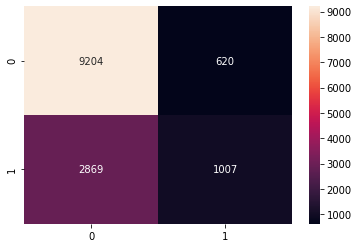

In [12]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, rf_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

###### Tomamos nota que el modelo clasifica muy poco positivo. Utilizaremos más adelante probabilidad y customizaremos variables y parámetros para mejorar el índice de predicción ######

#### Evaluamos la importancia para las diferentes variables ####

False


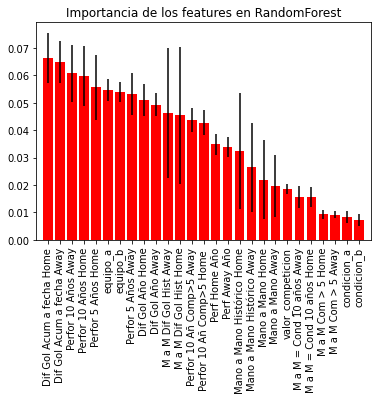

In [13]:
importancias = rf.feature_importances_
print (all(importancias == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)))
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importancias)[::-1]
nombres_features = X.columns

# Graficar la importancia de los features en el random forest
plt.figure()
plt.title("Importancia de los features en RandomForest")
plt.bar(range(X.shape[1]), importancias[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), nombres_features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Evaluamos el rendimiento de AdaBoost y GradientBoosting ####

In [14]:
#GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
evaluar_rendimiento(ab, "AdaBoostClassifier")
evaluar_rendimiento(gb, "GradientBoostingClassifier")

Rendimiento de AdaBoostClassifier:	0.587 ± 0.014
Rendimiento de GradientBoostingClassifier:	0.614 ± 0.022


## Buscamos probabilidades de ocurrencia ##

In [15]:
rf_pred_proba = rf.predict_proba(X_test)

In [17]:
rf_pred_proba.shape

(13700, 2)

In [19]:
rf_pred_proba[0:10]

array([[0.86, 0.14],
       [0.45, 0.55],
       [0.6 , 0.4 ],
       [0.86, 0.14],
       [0.93, 0.07],
       [0.96, 0.04],
       [0.92, 0.08],
       [0.62, 0.38],
       [0.92, 0.08],
       [0.59, 0.41]])

### Utilizamos el Modelo para predecir nuevos eventos ###

##### Importamos nuevo DataSet con partidos de las eliminatorias para predecir sus resultados de forma binaria por cada equipo en "Gana" o "No Gana" #####

In [20]:
Nuevo_df = pd.read_excel("DataSet_Predicciones_completo.xlsx")

In [21]:
Nuevo_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'Competicion Valoracion', 'Condicion A', 'Condicion B',
       'Resultado Home', 'Dif Goles Home', 'Resultado Away', 'Dif Goles Away ',
       'Dif Gol Acum Home', 'Dif Gol Acum Away', 'Performance Acum Home',
       'Performance Acum Away', 'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away', 'Target Binario Equip A', 'Target Binario Equip B',
       'Dif Gol Acum a fecha Home', 'Dif Gol Acum a fecha Away',
       'Mano a Mano Histórico Home', 'Mano a Mano Histórico Away',
       'M a M = Cond 10 años Home', 'M a M = Cond 10 años Away',
       'M a M Dif Gol Hist Home', 'M a M Dif Gol Hist Away',
       'Perfor 5 Años Home', 'Perfor 5 Años Away', 'Perfor 10 Años Home',
       'Perfor 10 Años Away', 'M a M Com > 5 Home', 'M a M Com > 5 Away',
       'Perfor 10 Añ Comp>5 Home ', 'Perfor 10 Añ Comp>5 Away'],
      dtype='object')

In [22]:
Nuevo_df.columns = ['fecha', 'equipo_a', 'equipo_b', 'goles_a',
        'goles_b', 'valor_competicion', 'condicion_a', 'condicion_b',
       'resultado_a', 'diferencia_gol_a', 'resultado_b', 'diferencia_gol_b',
       'Dif Gol Acum Home', 'Dif Gol Acum Away', 'Performance Acum Home',
       'Performance Acum Away', 'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away', 'TargetA','TargetB','Dif Gol Acum a fecha Home',
       'Dif Gol Acum a fecha Away', 'Mano a Mano Histórico Home',
       'Mano a Mano Histórico Away', 'M a M = Cond 10 años Home',
       'M a M = Cond 10 años Away', 'M a M Dif Gol Hist Home',
       'M a M Dif Gol Hist Away', 'Perfor 5 Años Home', 'Perfor 5 Años Away',
       'Perfor 10 Años Home', 'Perfor 10 Años Away', 'M a M Com > 5 Home',
       'M a M Com > 5 Away', 'Perfor 10 Añ Comp>5 Home ',
       'Perfor 10 Añ Comp>5 Away']

In [23]:
train_cols_pred = ['equipo_a', 'equipo_b','valor_competicion', 'condicion_a', 'condicion_b',
       'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away','Dif Gol Acum a fecha Home',
       'Dif Gol Acum a fecha Away', 'Mano a Mano Histórico Home',
       'Mano a Mano Histórico Away', 'M a M = Cond 10 años Home',
       'M a M = Cond 10 años Away', 'M a M Dif Gol Hist Home',
       'M a M Dif Gol Hist Away', 'Perfor 5 Años Home', 'Perfor 5 Años Away',
       'Perfor 10 Años Home', 'Perfor 10 Años Away', 'M a M Com > 5 Home',
       'M a M Com > 5 Away', 'Perfor 10 Añ Comp>5 Home ',
       'Perfor 10 Añ Comp>5 Away']
X_pred = Nuevo_df[train_cols_pred]
y_pred = Nuevo_df['TargetB']

In [24]:
Nueva_pred = rf.predict(X_pred)

##### Buscamos predecir los partidos de Eliminatorias que ya se jugaron para testear efectividad

In [25]:
Nueva_pred [124:134]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Nutrimos las predicciones con probabilidad de ocurrencia

In [57]:
Nueva_pred_proba = rf.predict_proba(X_pred)

In [58]:
Nueva_pred_proba [124:134]

array([[0.79, 0.21],
       [0.88, 0.12],
       [0.9 , 0.1 ],
       [0.9 , 0.1 ],
       [0.93, 0.07],
       [0.62, 0.38],
       [0.75, 0.25],
       [0.8 , 0.2 ],
       [0.61, 0.39],
       [0.75, 0.25]])

In [59]:
Nueva_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [60]:
Nueva_pred_proba

array([[0.96      , 0.04      ],
       [0.89      , 0.11      ],
       [0.58      , 0.42      ],
       [0.75      , 0.25      ],
       [0.74      , 0.26      ],
       [0.96      , 0.04      ],
       [0.95      , 0.05      ],
       [0.87      , 0.13      ],
       [0.86      , 0.14      ],
       [0.85      , 0.15      ],
       [0.92      , 0.08      ],
       [0.96      , 0.04      ],
       [0.98      , 0.02      ],
       [0.92      , 0.08      ],
       [0.97      , 0.03      ],
       [0.8       , 0.2       ],
       [0.34      , 0.66      ],
       [0.63      , 0.37      ],
       [1.        , 0.        ],
       [0.66      , 0.34      ],
       [0.33      , 0.67      ],
       [0.32      , 0.68      ],
       [0.61      , 0.39      ],
       [0.74      , 0.26      ],
       [0.77      , 0.23      ],
       [0.35      , 0.65      ],
       [0.44      , 0.56      ],
       [0.44      , 0.56      ],
       [0.49      , 0.51      ],
       [0.59      , 0.41      ],
       [0.

#### Convertimos el array de Numpy con las probabilidades de ocurrencia que predice el modelo en un Dataframe de Pandas ####

In [61]:
unidades_datos = np.array([[0.96      , 0.04      ],
       [0.89      , 0.11      ],
       [0.58      , 0.42      ],
       [0.75      , 0.25      ],
       [0.74      , 0.26      ],
       [0.96      , 0.04      ],
       [0.95      , 0.05      ],
       [0.87      , 0.13      ],
       [0.86      , 0.14      ],
       [0.85      , 0.15      ],
       [0.92      , 0.08      ],
       [0.96      , 0.04      ],
       [0.98      , 0.02      ],
       [0.92      , 0.08      ],
       [0.97      , 0.03      ],
       [0.8       , 0.2       ],
       [0.34      , 0.66      ],
       [0.63      , 0.37      ],
       [1.        , 0.        ],
       [0.66      , 0.34      ],
       [0.33      , 0.67      ],
       [0.32      , 0.68      ],
       [0.61      , 0.39      ],
       [0.74      , 0.26      ],
       [0.77      , 0.23      ],
       [0.35      , 0.65      ],
       [0.44      , 0.56      ],
       [0.44      , 0.56      ],
       [0.49      , 0.51      ],
       [0.59      , 0.41      ],
       [0.44      , 0.56      ],
       [0.72      , 0.28      ],
       [0.97542494, 0.02457506],
       [0.89      , 0.11      ],
       [0.72      , 0.28      ],
       [0.93      , 0.07      ],
       [0.9       , 0.1       ],
       [0.94      , 0.06      ],
       [0.96      , 0.04      ],
       [0.89      , 0.11      ],
       [0.57      , 0.43      ],
       [0.91      , 0.09      ],
       [0.88      , 0.12      ],
       [0.41      , 0.59      ],
       [0.94      , 0.06      ],
       [0.38      , 0.62      ],
       [0.96      , 0.04      ],
       [0.98      , 0.02      ],
       [0.78      , 0.22      ],
       [0.35      , 0.65      ],
       [0.95      , 0.05      ],
       [0.77372207, 0.22627793],
       [0.83      , 0.17      ],
       [0.84      , 0.16      ],
       [0.99      , 0.01      ],
       [0.86      , 0.14      ],
       [0.91      , 0.09      ],
       [0.62      , 0.38      ],
       [0.94      , 0.06      ],
       [0.78      , 0.22      ],
       [0.7       , 0.3       ],
       [0.91      , 0.09      ],
       [0.89      , 0.11      ],
       [0.77      , 0.23      ],
       [0.91      , 0.09      ],
       [0.89      , 0.11      ],
       [0.84      , 0.16      ],
       [0.88      , 0.12      ],
       [0.78      , 0.22      ],
       [0.89283285, 0.10716715],
       [0.9       , 0.1       ],
       [0.61      , 0.39      ],
       [0.85      , 0.15      ],
       [0.93      , 0.07      ],
       [0.84      , 0.16      ],
       [0.83      , 0.17      ],
       [0.59165016, 0.40834984],
       [0.6       , 0.4       ],
       [0.77      , 0.23      ],
       [0.73283285, 0.26716715],
       [0.41      , 0.59      ],
       [0.6       , 0.4       ],
       [0.57      , 0.43      ],
       [0.62      , 0.38      ],
       [0.62      , 0.38      ],
       [0.73441499, 0.26558501],
       [0.8       , 0.2       ],
       [0.66      , 0.34      ],
       [0.82283285, 0.17716715],
       [0.72      , 0.28      ],
       [0.8       , 0.2       ],
       [0.97      , 0.03      ],
       [0.95      , 0.05      ],
       [0.94      , 0.06      ],
       [0.76      , 0.24      ],
       [0.86441499, 0.13558501],
       [0.56      , 0.44      ],
       [0.89      , 0.11      ],
       [0.94      , 0.06      ],
       [0.84      , 0.16      ],
       [0.89      , 0.11      ],
       [0.78      , 0.22      ],
       [0.51      , 0.49      ],
       [0.57165016, 0.42834984],
       [0.88      , 0.12      ],
       [0.87      , 0.13      ],
       [0.58      , 0.42      ],
       [0.67      , 0.33      ],
       [0.68      , 0.32      ],
       [0.69      , 0.31      ],
       [0.83      , 0.17      ],
       [0.67      , 0.33      ],
       [0.78      , 0.22      ],
       [0.92      , 0.08      ],
       [0.75      , 0.25      ],
       [0.94      , 0.06      ],
       [0.78      , 0.22      ],
       [0.83441499, 0.16558501],
       [0.8       , 0.2       ],
       [0.87      , 0.13      ],
       [0.77      , 0.23      ],
       [0.95      , 0.05      ],
       [0.78      , 0.22      ],
       [0.88      , 0.12      ],
       [0.79      , 0.21      ],
       [0.88      , 0.12      ],
       [0.9       , 0.1       ],
       [0.9       , 0.1       ],
       [0.93      , 0.07      ],
       [0.62      , 0.38      ],
       [0.75      , 0.25      ],
       [0.8       , 0.2       ],
       [0.61      , 0.39      ],
       [0.75      , 0.25      ],
       [0.93      , 0.07      ],
       [0.82      , 0.18      ],
       [0.73441499, 0.26558501],
       [0.46      , 0.54      ],
       [0.87      , 0.13      ],
       [0.65      , 0.35      ],
       [0.6       , 0.4       ],
       [0.62      , 0.38      ],
       [0.6       , 0.4       ],
       [0.97      , 0.03      ],
       [0.8       , 0.2       ],
       [0.74      , 0.26      ],
       [0.66      , 0.34      ],
       [0.87      , 0.13      ],
       [0.6       , 0.4       ],
       [0.88      , 0.12      ],
       [0.79      , 0.21      ],
       [0.43      , 0.57      ],
       [0.63165016, 0.36834984],
       [0.97      , 0.03      ],
       [0.91      , 0.09      ],
       [0.62165016, 0.37834984],
       [0.6       , 0.4       ],
       [0.89      , 0.11      ],
       [0.91      , 0.09      ],
       [0.74      , 0.26      ],
       [0.65      , 0.35      ],
       [0.56      , 0.44      ],
       [0.88      , 0.12      ],
       [0.58      , 0.42      ],
       [0.69      , 0.31      ],
       [0.44      , 0.56      ],
       [0.52      , 0.48      ],
       [0.74441499, 0.25558501],
       [0.72      , 0.28      ],
       [0.89      , 0.11      ],
       [0.71      , 0.29      ],
       [0.93      , 0.07      ],
       [0.93441499, 0.06558501],
       [0.83      , 0.17      ],
       [0.75      , 0.25      ],
       [0.93612556, 0.06387444],
       [0.5       , 0.5       ],
       [0.75      , 0.25      ],
       [0.52      , 0.48      ],
       [0.88      , 0.12      ],
       [0.81      , 0.19      ],
       [0.79      , 0.21      ],
       [0.93      , 0.07      ],
       [0.79      , 0.21      ],
       [0.72      , 0.28      ],
       [0.82      , 0.18      ],
       [0.75      , 0.25      ],
       [0.77      , 0.23      ],
       [0.8       , 0.2       ],
       [0.86      , 0.14      ],
       [0.73442138, 0.26557862],
       [0.6       , 0.4       ],
       [0.84      , 0.16      ],
       [0.66399699, 0.33600301],
       [0.53      , 0.47      ],
       [0.31      , 0.69      ],
       [0.76      , 0.24      ],
       [0.76      , 0.24      ],
       [0.84      , 0.16      ],
       [0.61      , 0.39      ],
       [0.79      , 0.21      ],
       [0.89      , 0.11      ],
       [0.86      , 0.14      ],
       [0.77      , 0.23      ],
       [0.91      , 0.09      ],
       [0.93      , 0.07      ],
       [0.88      , 0.12      ],
       [0.91      , 0.09      ],
       [0.85      , 0.15      ],
       [0.49      , 0.51      ],
       [0.48      , 0.52      ],
       [0.8       , 0.2       ],
       [0.704483  , 0.295517  ],
       [0.59      , 0.41      ]])

In [62]:
unidades_datos

array([[0.96      , 0.04      ],
       [0.89      , 0.11      ],
       [0.58      , 0.42      ],
       [0.75      , 0.25      ],
       [0.74      , 0.26      ],
       [0.96      , 0.04      ],
       [0.95      , 0.05      ],
       [0.87      , 0.13      ],
       [0.86      , 0.14      ],
       [0.85      , 0.15      ],
       [0.92      , 0.08      ],
       [0.96      , 0.04      ],
       [0.98      , 0.02      ],
       [0.92      , 0.08      ],
       [0.97      , 0.03      ],
       [0.8       , 0.2       ],
       [0.34      , 0.66      ],
       [0.63      , 0.37      ],
       [1.        , 0.        ],
       [0.66      , 0.34      ],
       [0.33      , 0.67      ],
       [0.32      , 0.68      ],
       [0.61      , 0.39      ],
       [0.74      , 0.26      ],
       [0.77      , 0.23      ],
       [0.35      , 0.65      ],
       [0.44      , 0.56      ],
       [0.44      , 0.56      ],
       [0.49      , 0.51      ],
       [0.59      , 0.41      ],
       [0.

In [63]:
unidades = pd.DataFrame(unidades_datos)

In [64]:
unidades

,0,1
0,0.960000,0.040000
1,0.890000,0.110000
2,0.580000,0.420000
3,0.750000,0.250000
4,0.740000,0.260000
...,...,...
209,0.490000,0.510000
210,0.480000,0.520000
211,0.800000,0.200000
212,0.704483,0.295517


#### Exportamos a un CSV las probabilidades de ocurrencia de "Gana" y "No Gana". ####

In [68]:
unidades.to_csv("output.csv")